<a href="https://colab.research.google.com/github/LeHoangHoa0941/CNN_AI_6_training_image/blob/main/10_Tropical_fruit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers.pooling import MaxPooling2D
from keras.backend import conv2d
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout
from keras.layers.core.flatten import Flatten

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path = '/content/drive/MyDrive/Tropical_fruit/train'
test_path = '/content/drive/MyDrive/Tropical_fruit/test'

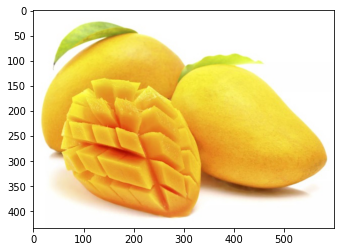

In [ ]:
img = load_img('/content/drive/MyDrive/Tropical_fruit/train/mango/xoai (1).jpg')
rotated_image = img.rotate(0)
plt.imshow(rotated_image)

In [ ]:
X_train = ImageDataGenerator(rescale=1/255)
X_test = ImageDataGenerator(rescale=1/255)

In [ ]:
train_dataset = X_train.flow_from_directory(
    directory=r"/content/drive/MyDrive/Tropical_fruit/train",
    target_size=(150, 150),
    batch_size=3,
    class_mode="categorical",
    )
test_dataset = X_test.flow_from_directory(
    directory=r"/content/drive/MyDrive/Tropical_fruit/test",
    target_size=(150, 150),
    batch_size=3,
    class_mode= "categorical",
    )

Found 454 images belonging to 10 classes.
Found 193 images belonging to 10 classes.


In [ ]:
train_dataset.class_indices

{'apple': 0,
 'avovado': 1,
 'banana': 2,
 'dragonfruit': 3,
 'kiwi': 4,
 'mango': 5,
 'orange': 6,
 'passionfruit': 7,
 'pinaple': 8,
 'watermelon': 9}

In [ ]:
from keras.layers.core.flatten import Flatten
model = Sequential([
    Conv2D(16,(3,3), padding='same', activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32,(3,3), padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64,(3,3), padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(128,(3,3), padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(128,(3,3), padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        1

In [ ]:
model.compile(optimizer='adam',loss ='categorical_crossentropy',metrics =['accuracy'])
history=model.fit(train_dataset,epochs=30,batch_size=64,verbose=1,validation_data= test_dataset)

Epoch 1/30
152/152 [==============================] - 202s 1s/step - loss: 2.2422 - accuracy: 0.1366 - val_loss: 1.8106 - val_accuracy: 0.1865
Epoch 2/30
152/152 [==============================] - 4s 28ms/step - loss: 1.5998 - accuracy: 0.3789 - val_loss: 1.4611 - val_accuracy: 0.4041
Epoch 3/30
152/152 [==============================] - 4s 27ms/step - loss: 1.2482 - accuracy: 0.5198 - val_loss: 2.3455 - val_accuracy: 0.3161
Epoch 4/30
152/152 [==============================] - 4s 27ms/step - loss: 1.1314 - accuracy: 0.5771 - val_loss: 1.2644 - val_accuracy: 0.5181
Epoch 5/30
152/152 [==============================] - 4s 27ms/step - loss: 0.8684 - accuracy: 0.6762 - val_loss: 1.1321 - val_accuracy: 0.5803
Epoch 6/30
152/152 [==============================] - 4s 27ms/step - loss: 0.7953 - accuracy: 0.7225 - val_loss: 1.0543 - val_accuracy: 0.5855
Epoch 7/30
152/152 [==============================] - 4s 27ms/step - loss: 0.6585 - accuracy: 0.7797 - val_loss: 1.0486 - val_accuracy: 0.5648

In [ ]:
model.save('10_Tropical_fruit_training.h5')

In [ ]:
from keras.models import load_model
model5 = load_model('10_Tropical_fruit_training.h5')

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=history.epoch,
                         y=history.history['accuracy'],
                         mode='lines+markers',
                         name='Training accuracy'))
fig.add_trace(go.Scatter(x=history.epoch,
                         y=history.history['val_accuracy'],
                         mode='lines+markers',
                         name='Validation accuracy'))
fig.update_layout(title='Accuracy',
                  xaxis=dict(title='Epoch'),
                  yaxis=dict(title='Percentage'))
fig.show()

In [ ]:
labels = {0: 'apple',
          1: 'avovado',
          2: 'banana',
          3: 'dragonfruit',
          4: 'kiwi',
          5: 'mango',
          6: 'orange',
          7: 'passionfruit',
          8: 'pinaple',
          9: 'watermelon'}

Day la mon:  watermelon


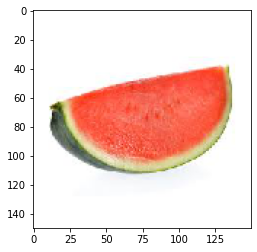

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/drive/MyDrive/Tropical_fruit/train/watermelon/watermelon (13).jpg', target_size =(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img.shape
val = model5.predict(img)
np.argmax(val,axis= 1)
print('Day la trai: ', labels[np.argmax(val)])

Day la trai:  pinaple


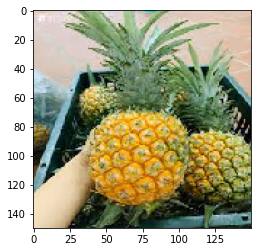

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/dua2.jpg', target_size =(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img.shape
val = model5.predict(img)
np.argmax(val,axis= 1)
print('Day la trai: ', labels[np.argmax(val)])

Day la trai:  kiwi


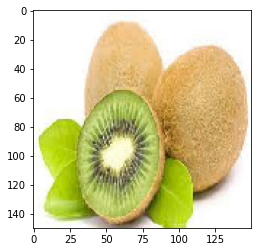

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/kiwi2.jpg', target_size =(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img.shape
val = model5.predict(img)
np.argmax(val,axis= 1)
print('Day la trai: ', labels[np.argmax(val)])

Day la trai:  dragonfruit


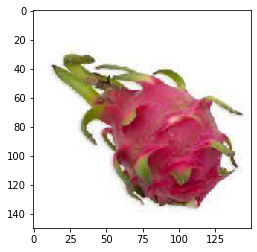

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/thanhlong_test.jpg', target_size =(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img.shape
val = model5.predict(img)
np.argmax(val,axis= 1)
print('Day la trai: ', labels[np.argmax(val)])

Day la trai:  orange


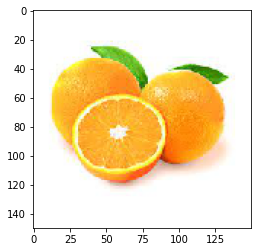

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/drive/MyDrive/Tropical_fruit/train/orange/orange (47).jpg', target_size =(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img.shape
val = model5.predict(img)
np.argmax(val,axis= 1)
print('Day la trai: ', labels[np.argmax(val)])